In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("/content/cleaned_hip_replacement_data.csv")
df.head()


,health_service_area,hospital_county,operating_certificate_number,facility_id,facility_name,age_group,zip_code_3_digits,gender,race,ethnicity,...,apr_severity_of_illness_code,apr_severity_of_illness_description,apr_risk_of_mortality,apr_medical_surgical_description,attending_provider_license_number,operating_provider_license_number,total_charges,total_costs,charge_to_cost_ratio,efficiency_index
0,western ny,allegany,228000,39,memorial hosp of wm f & gertrude f jones a/k/a...,50 to 69,148,f,white,not span/hispanic,...,2,moderate,minor,surgical,213053,213053,34289.25,16657.95,2.058432,0.000015
1,western ny,allegany,228000,39,memorial hosp of wm f & gertrude f jones a/k/a...,50 to 69,147,m,white,not span/hispanic,...,2,moderate,minor,surgical,213053,213053,30436.00,14703.62,2.069966,0.000023
2,western ny,allegany,228000,39,memorial hosp of wm f & gertrude f jones a/k/a...,50 to 69,147,m,white,not span/hispanic,...,1,minor,minor,surgical,213053,213053,28699.00,13903.30,2.064186,0.000024
3,western ny,allegany,228000,39,memorial hosp of wm f & gertrude f jones a/k/a...,50 to 69,148,m,white,not span/hispanic,...,1,minor,minor,surgical,213053,213053,18421.00,8258.43,2.230569,0.000061
4,western ny,allegany,228000,39,memorial hosp of wm f & gertrude f jones a/k/a...,50 to 69,148,m,white,not span/hispanic,...,2,moderate,minor,surgical,213053,213053,29040.00,13950.49,2.081647,0.000024


# Exploratory Data Analysis (EDA)

Dataset Structure

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23080 entries, 0 to 23079
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   health_service_area                  23080 non-null  object 
 1   hospital_county                      23080 non-null  object 
 2   operating_certificate_number         23080 non-null  int64  
 3   facility_id                          23080 non-null  int64  
 4   facility_name                        23080 non-null  object 
 5   age_group                            23080 non-null  object 
 6   zip_code_3_digits                    23080 non-null  object 
 7   gender                               23080 non-null  object 
 8   race                                 23080 non-null  object 
 9   ethnicity                            23080 non-null  object 
 10  length_of_stay                       23080 non-null  int64  
 11  type_of_admission           

Purpose:

Understand data types

Identify numerical vs categorical features

In [3]:
df.isnull().sum()


,0
health_service_area,0
hospital_county,0
operating_certificate_number,0
facility_id,0
facility_name,0
age_group,0
zip_code_3_digits,0
gender,0
race,0
ethnicity,0


Confirms preprocessing effectiveness

Ensures dataset is ready for analysis

In [4]:
df.describe()


,operating_certificate_number,facility_id,length_of_stay,discharge_year,ccs_diagnosis_code,ccs_procedure_code,apr_drg_code,apr_mdc_code,apr_severity_of_illness_code,attending_provider_license_number,operating_provider_license_number,total_charges,total_costs,charge_to_cost_ratio,efficiency_index
count,2.308000e+04,23080.000000,23080.000000,23080.0,23080.000000,23080.000000,23080.0,23080.0,23080.000000,2.308000e+04,2.308000e+04,23080.000000,23080.000000,23080.000000,23080.000000
mean,4.304858e+06,876.237348,2.269107,2016.0,204.888692,153.131109,301.0,8.0,1.579506,4.765255e+05,4.439661e+05,51921.713553,18029.953120,2.841940,0.000035
std,2.412024e+06,596.771273,0.866484,0.0,8.540616,2.498245,0.0,0.0,0.560098,4.788595e+06,4.577340e+06,25004.366546,5978.461075,0.811238,0.000105
min,1.010000e+05,1.000000,1.000000,2016.0,1.000000,58.000000,301.0,8.0,1.000000,9.238200e+04,9.238200e+04,458.000000,64.450000,0.662480,0.000007
25%,2.701001e+06,409.000000,2.000000,2016.0,203.000000,153.000000,301.0,8.0,1.000000,1.702540e+05,1.702390e+05,30780.267500,13121.702500,2.317888,0.000018
50%,3.950000e+06,752.000000,2.000000,2016.0,203.000000,153.000000,301.0,8.0,2.000000,2.069400e+05,2.069400e+05,47351.925000,17306.585000,2.766150,0.000025
75%,7.002012e+06,1447.000000,3.000000,2016.0,203.000000,153.000000,301.0,8.0,2.000000,2.447990e+05,2.447990e+05,65836.265000,22300.180000,3.165175,0.000043
max,7.004010e+06,3376.000000,4.000000,2016.0,238.000000,231.000000,301.0,8.0,4.000000,9.027206e+07,9.063684e+07,131375.090000,38018.700000,7.106284,0.015516


Insights obtained:

Central tendency (mean, median)

Spread (std, min, max)

Data range

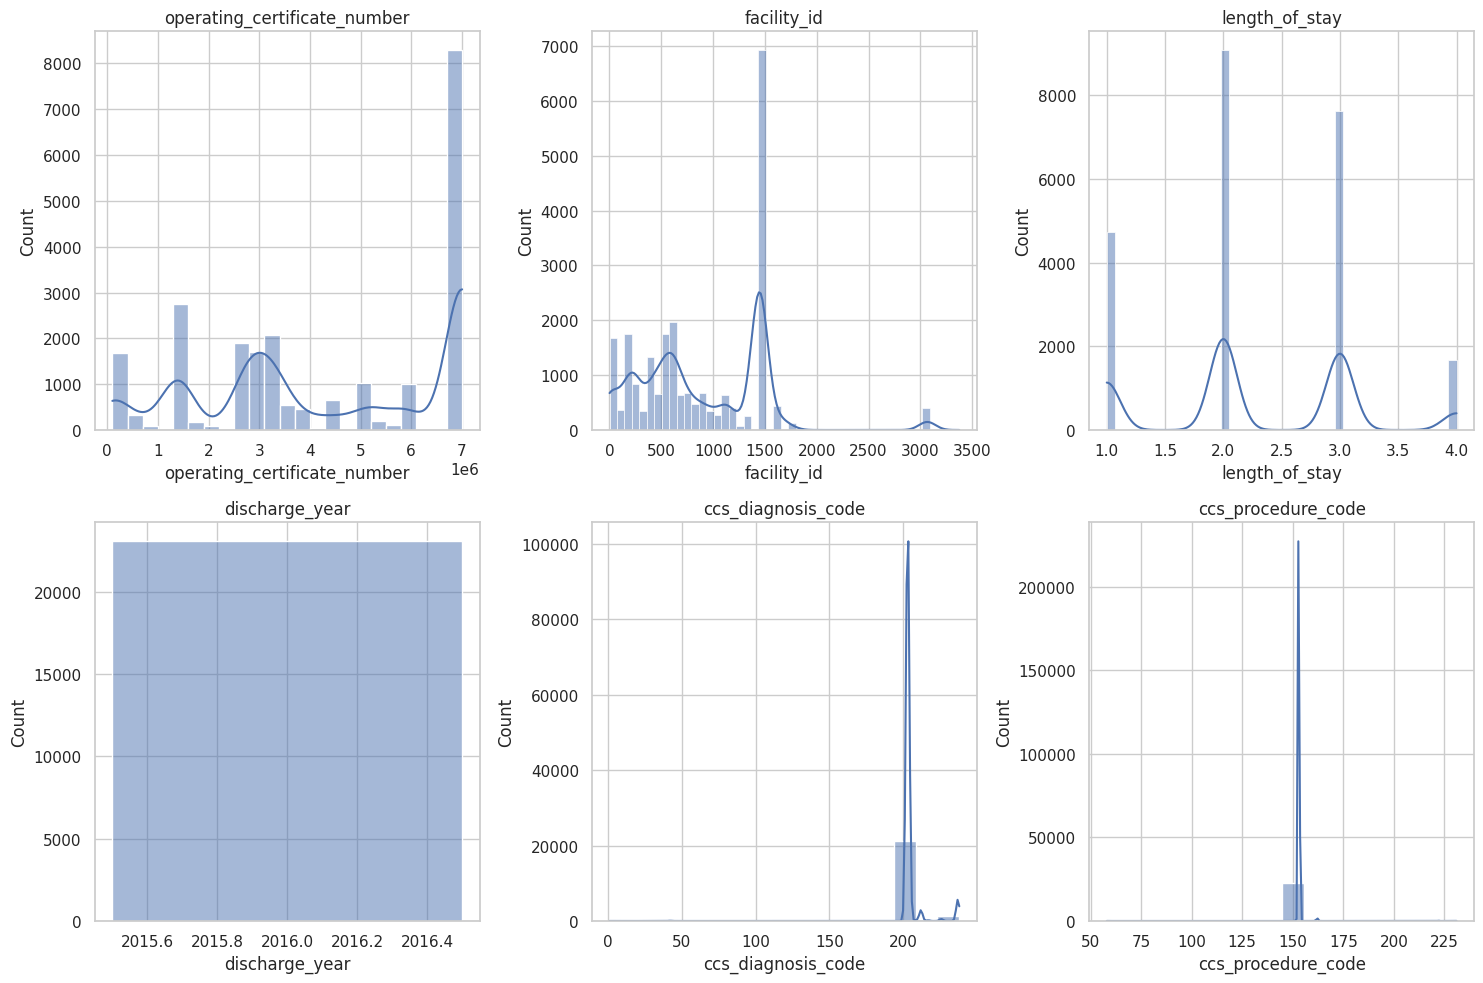

In [5]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols[:6], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


Purpose:

Identify skewness

Detect long tails or abnormal distributions

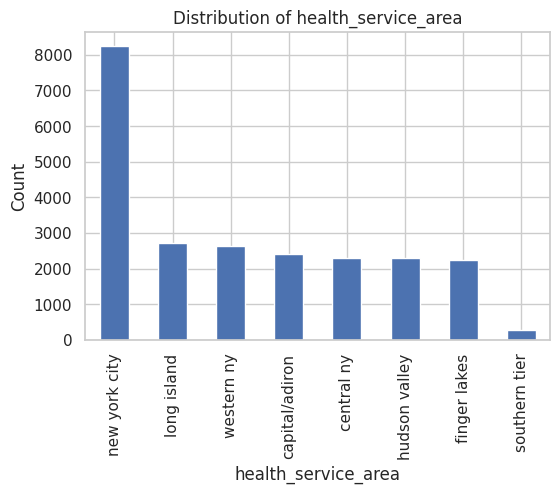

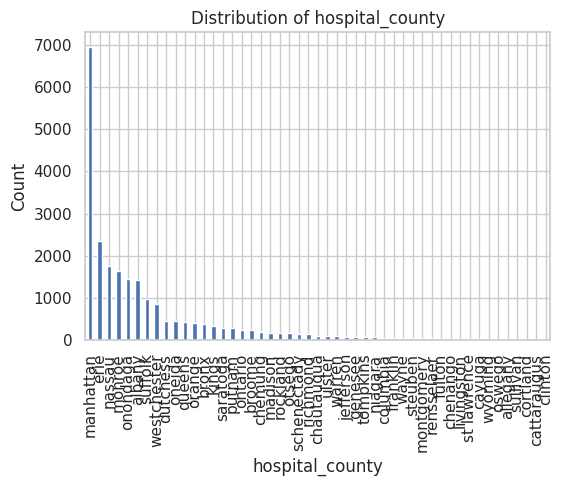

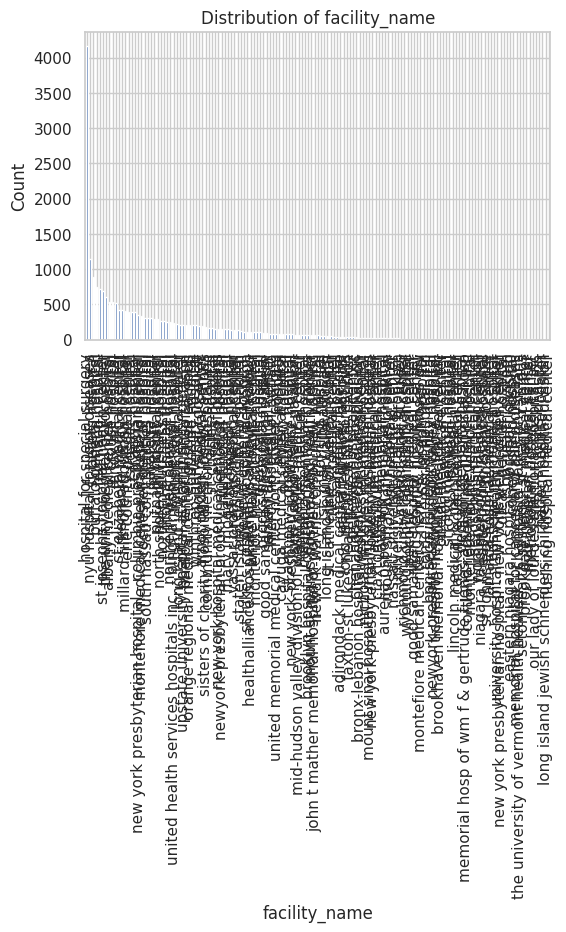

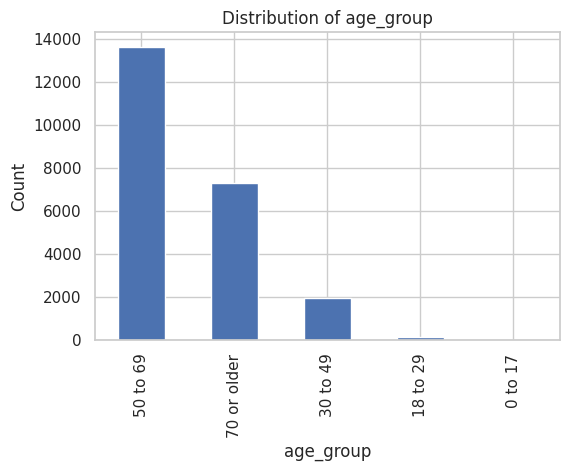

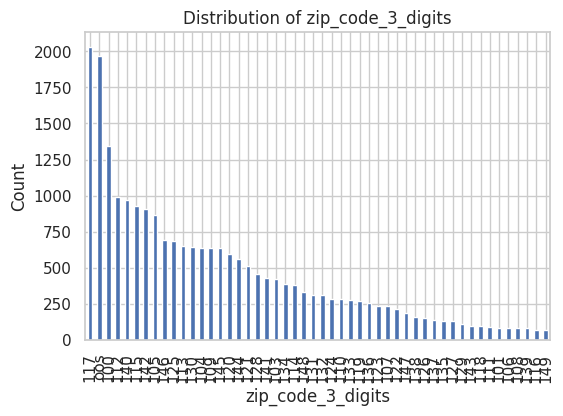

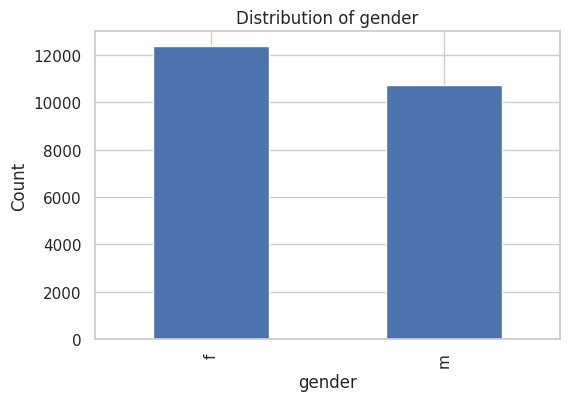

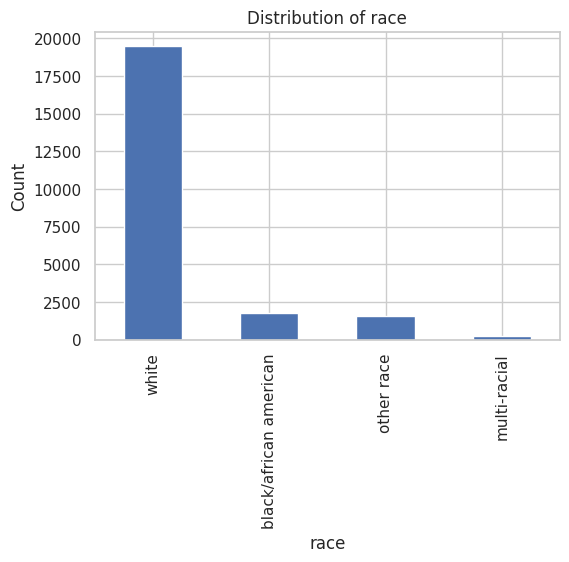

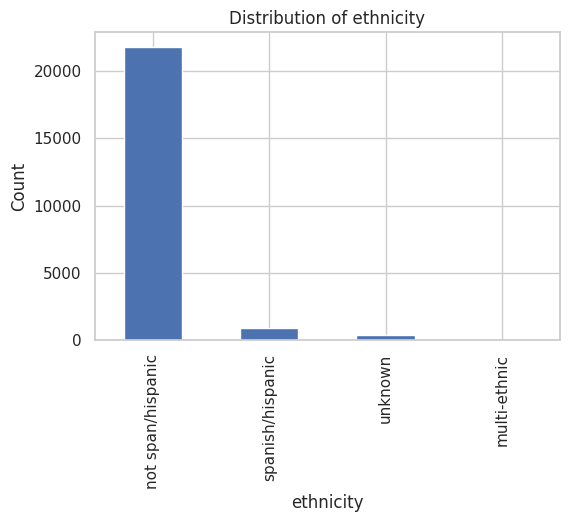

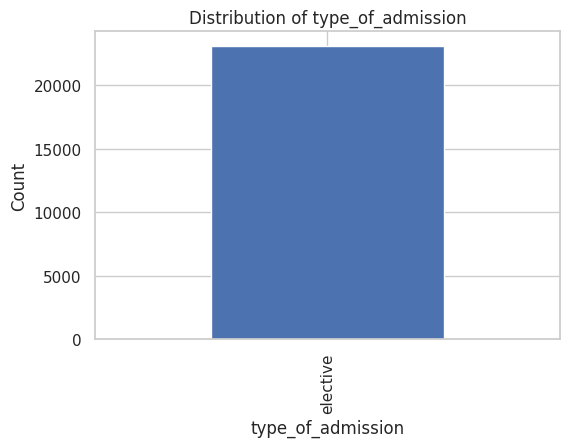

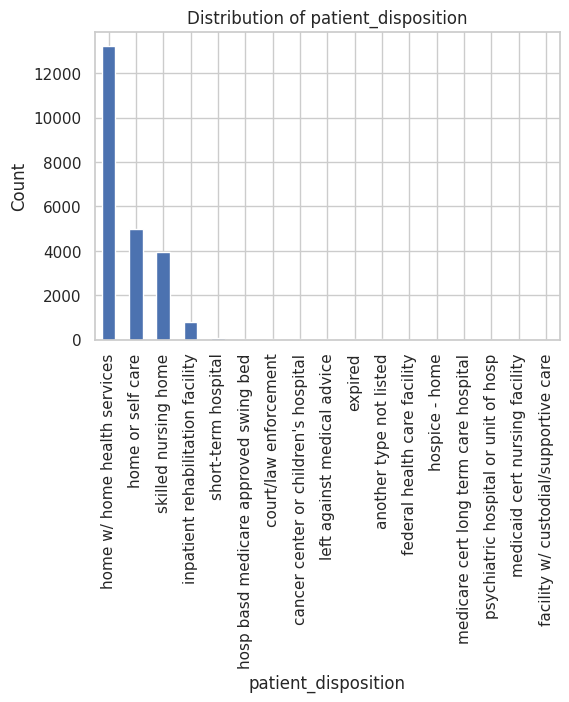

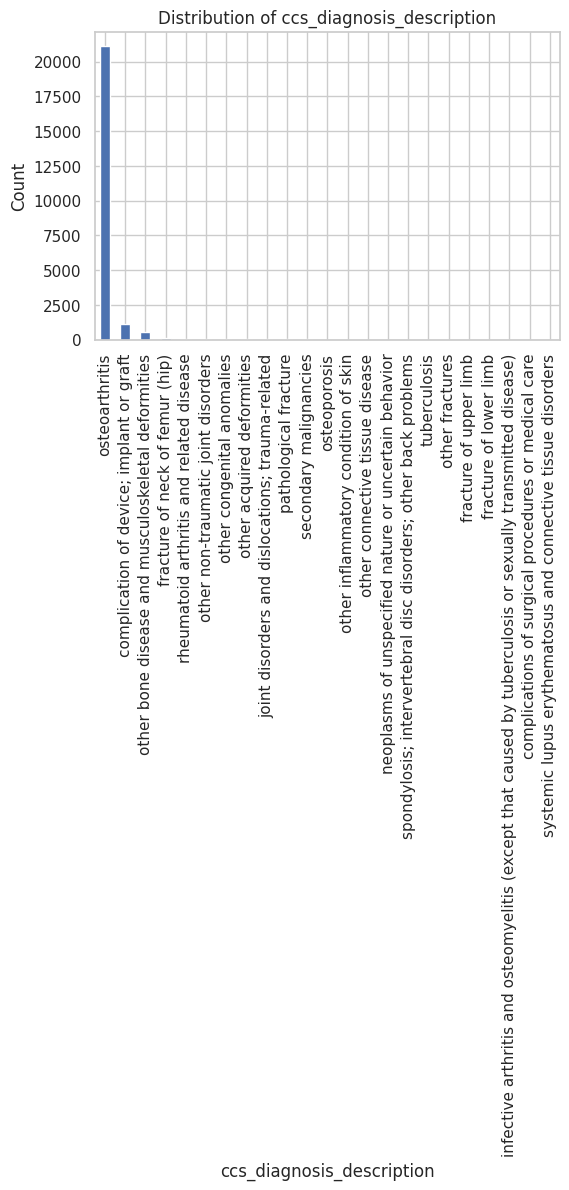

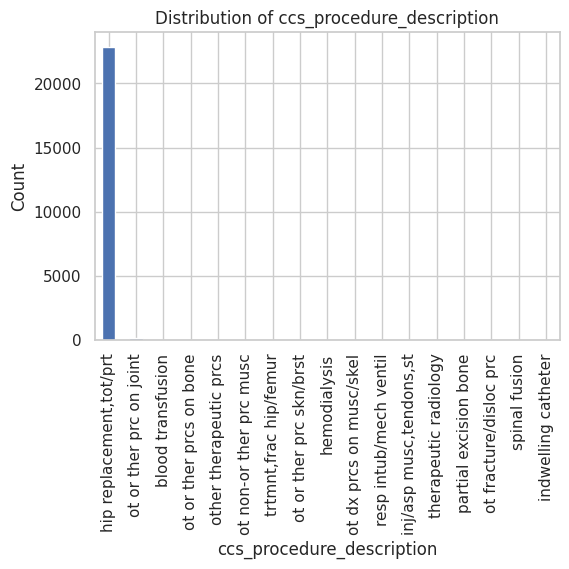

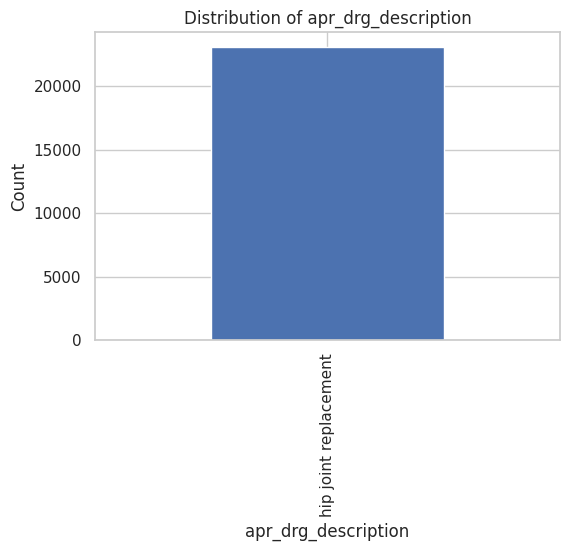

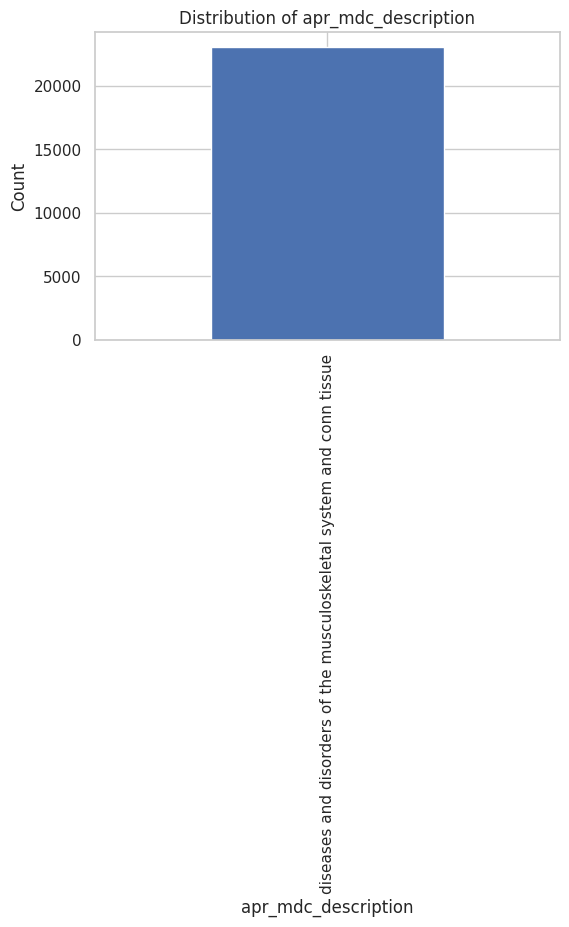

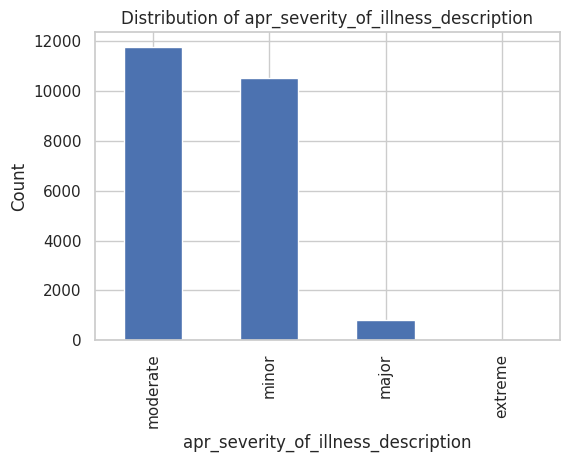

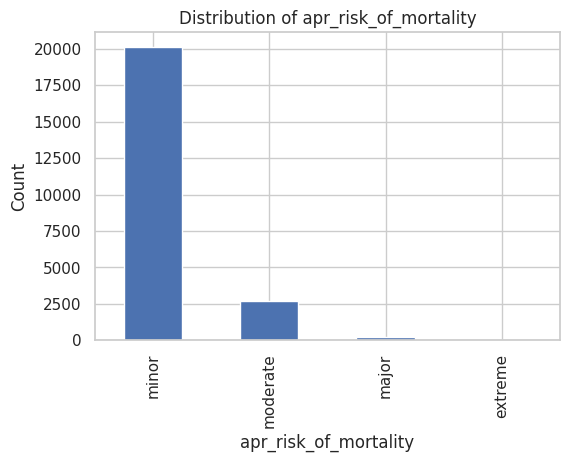

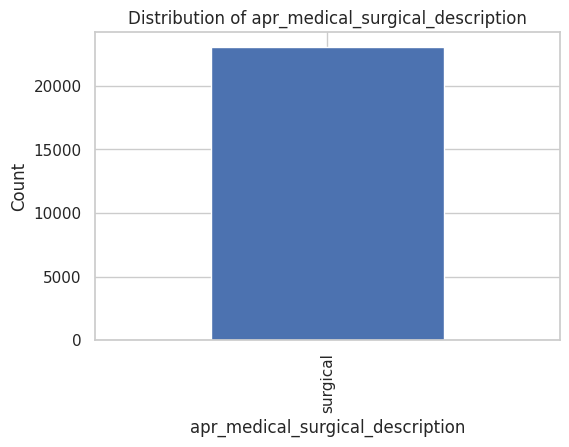

In [6]:
cat_cols = df.select_dtypes(include=["object"]).columns

for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Distribution of {col}")
    plt.ylabel("Count")
    plt.show()


Purpose:

Identify dominant categories

Understand hospital/region distribution

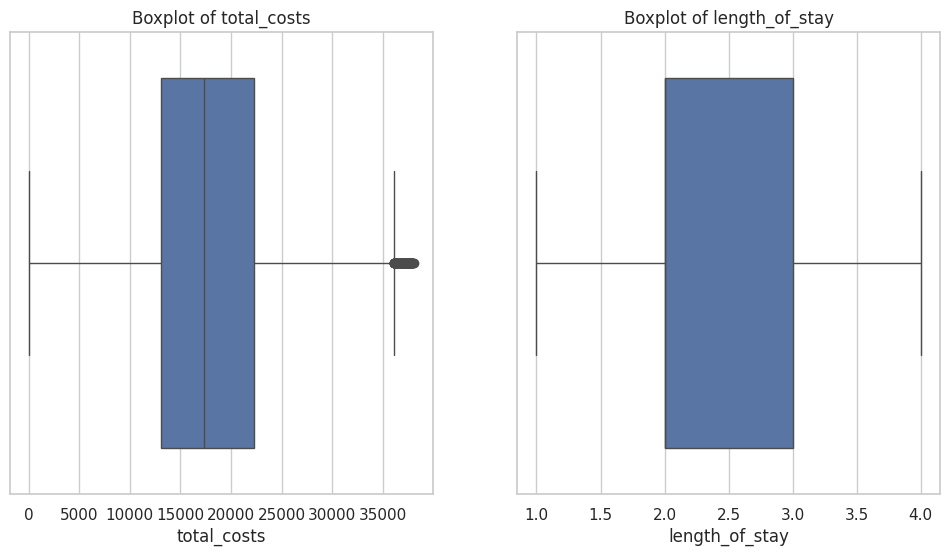

In [8]:
plt.figure(figsize=(12,6))
for i, col in enumerate(["total_costs", "length_of_stay"], 1):
    plt.subplot(1, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.show()

Purpose:

Validate outlier handling

Ensure no extreme anomalies remain

# Univariate Analysis

In [9]:
for col in num_cols:
    print(f"\nFeature: {col}")
    print(df[col].describe())



Feature: operating_certificate_number
count    2.308000e+04
mean     4.304858e+06
std      2.412024e+06
min      1.010000e+05
25%      2.701001e+06
50%      3.950000e+06
75%      7.002012e+06
max      7.004010e+06
Name: operating_certificate_number, dtype: float64

Feature: facility_id
count    23080.000000
mean       876.237348
std        596.771273
min          1.000000
25%        409.000000
50%        752.000000
75%       1447.000000
max       3376.000000
Name: facility_id, dtype: float64

Feature: length_of_stay
count    23080.000000
mean         2.269107
std          0.866484
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: length_of_stay, dtype: float64

Feature: discharge_year
count    23080.0
mean      2016.0
std          0.0
min       2016.0
25%       2016.0
50%       2016.0
75%       2016.0
max       2016.0
Name: discharge_year, dtype: float64

Feature: ccs_diagnosis_code
count    23080.000000
mean       204.

Analyzes each feature independently

Identifies skewed or concentrated variables

In [10]:
for col in cat_cols:
    print(f"\nFeature: {col}")
    print(df[col].value_counts())



Feature: health_service_area
health_service_area
new york city     8236
long island       2722
western ny        2636
capital/adiron    2403
central ny        2296
hudson valley     2289
finger lakes      2228
southern tier      270
Name: count, dtype: int64

Feature: hospital_county
hospital_county
manhattan      6947
erie           2346
nassau         1751
monroe         1641
onondaga       1439
albany         1424
suffolk         971
westchester     855
dutchess        463
oneida          460
queens          443
orange          400
bronx           383
kings           327
saratoga        300
putnam          287
ontario         245
broome          239
chemung         197
madison         174
rockland        171
otsego          161
schenectady     156
richmond        136
chautauqua      112
ulster          106
warren          101
jefferson        86
genesee          80
tompkins         75
niagara          75
columbia         64
franklin         63
wayne            59
steuben          5

In [11]:
for col in cat_cols:
    print(f"\nFeature: {col}")
    print(df[col].value_counts())



Feature: health_service_area
health_service_area
new york city     8236
long island       2722
western ny        2636
capital/adiron    2403
central ny        2296
hudson valley     2289
finger lakes      2228
southern tier      270
Name: count, dtype: int64

Feature: hospital_county
hospital_county
manhattan      6947
erie           2346
nassau         1751
monroe         1641
onondaga       1439
albany         1424
suffolk         971
westchester     855
dutchess        463
oneida          460
queens          443
orange          400
bronx           383
kings           327
saratoga        300
putnam          287
ontario         245
broome          239
chemung         197
madison         174
rockland        171
otsego          161
schenectady     156
richmond        136
chautauqua      112
ulster          106
warren          101
jefferson        86
genesee          80
tompkins         75
niagara          75
columbia         64
franklin         63
wayne            59
steuben          5

Shows frequency distribution

Helps identify dominant hospital types or regions

# Bivariate Analysis

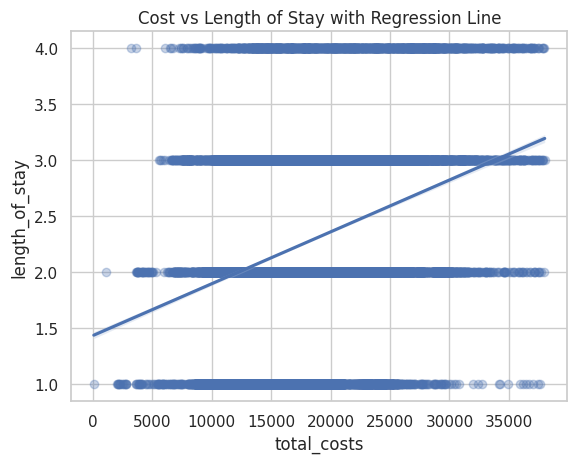

In [15]:
sns.regplot(
    x="total_costs",
    y="length_of_stay",
    data=df,
    scatter_kws={'alpha':0.3} # Optional: make scatter points slightly transparent
)
plt.title("Cost vs Length of Stay with Regression Line")
plt.show()

Interpretation:

Higher cost often correlates with longer hospital stays

Correlation Matrix

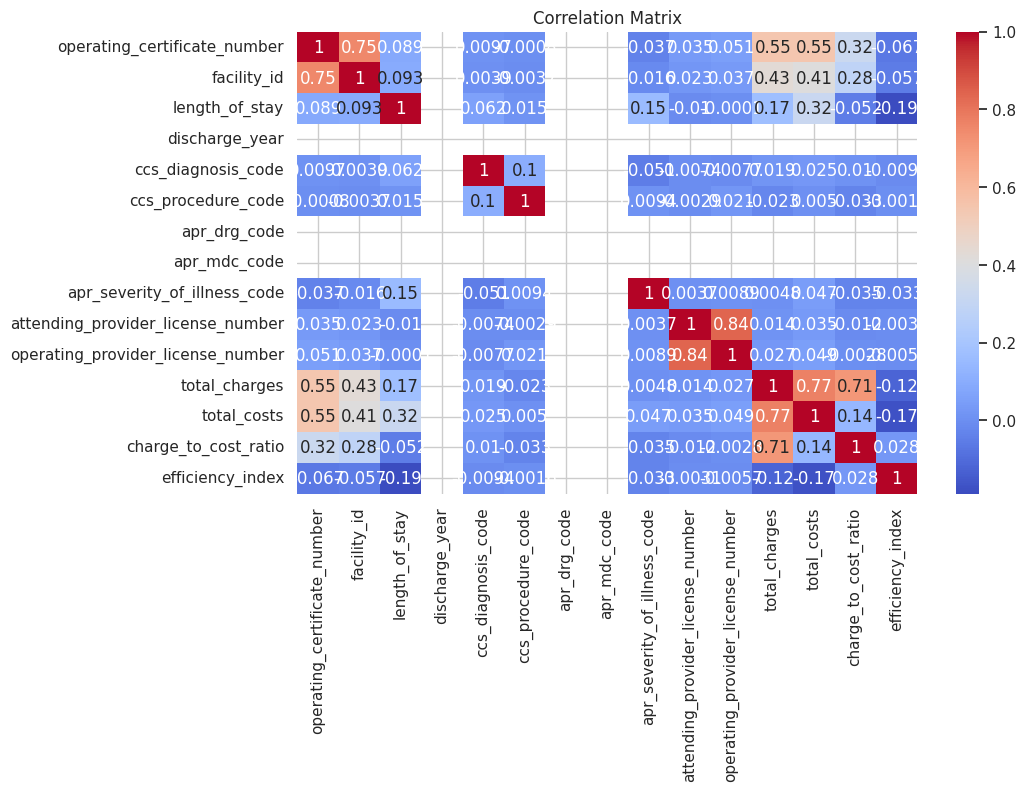

In [16]:
corr = df[num_cols].corr(method="pearson")

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Identifies strong positive/negative relationships

Useful for feature selection

Numerical vs Categorical

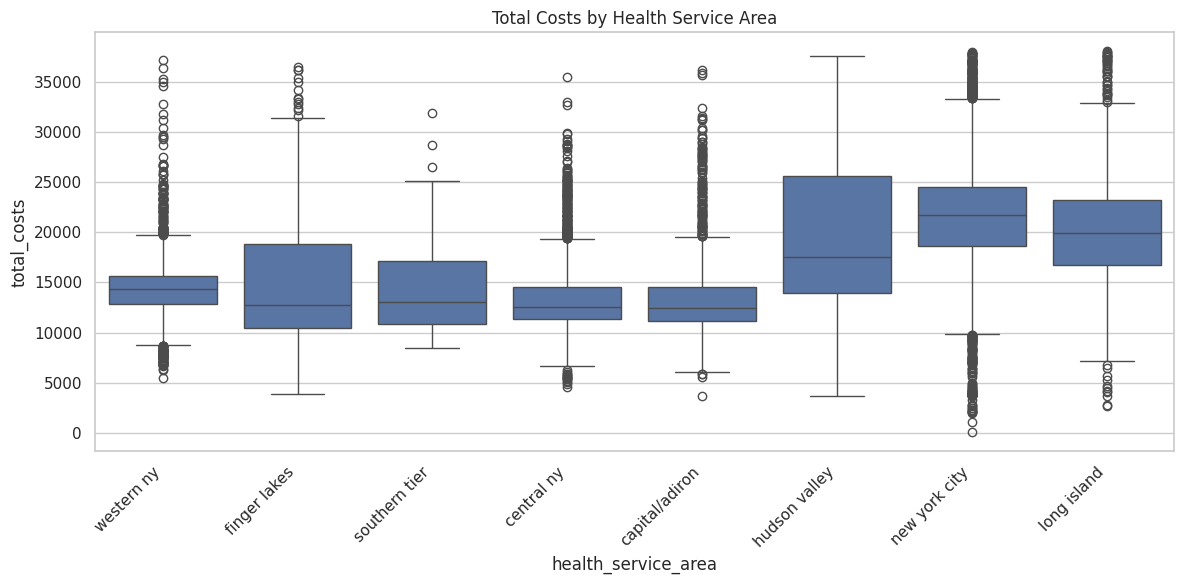

In [18]:
plt.figure(figsize=(12,6))
sns.boxplot(
    x="health_service_area",
    y="total_costs",
    data=df
)
plt.title("Total Costs by Health Service Area")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Understand interaction among all numerical variables

# Principal Component Analysis (PCA)

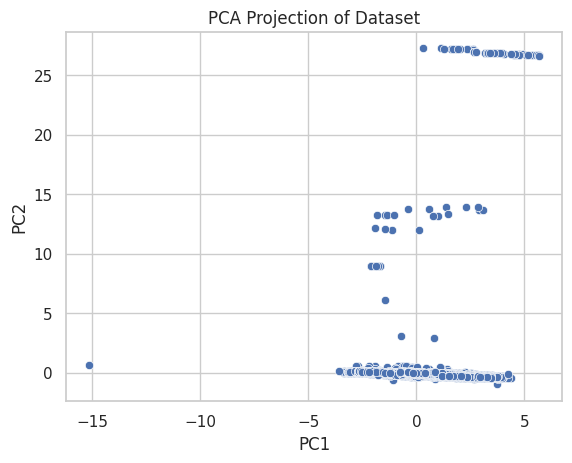

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df[num_cols]
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    data=principal_components,
    columns=["PC1", "PC2"]
)

sns.scatterplot(x="PC1", y="PC2", data=pca_df)
plt.title("PCA Projection of Dataset")
plt.show()


Reduces dimensionality

Captures maximum variance in fewer components

# Conclusion and Insights

**Key Findings:**

Cost and length of stay show a moderate positive correlation

Certain hospital types demonstrate higher efficiency indices

Charge-to-cost ratio varies significantly across hospitals

PCA reveals that a small number of components capture most data variance

**Business Insights:**

Hospitals with lower stay duration and cost tend to be more efficient

Charge-to-cost ratio can be used to benchmark hospital billing practices

Results can support healthcare cost optimization strategies